### Importing the libraries

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

Note: We removed all those features with a fill rate of less than 75% and saved it in df_new.csv which is being read in the following step

In [3]:
loans = pd.read_csv(r"C:\Users\Prashant\Desktop\Loan\df_new.csv")

In [4]:
loans.shape

(2260668, 87)

In [5]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [23]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303607 entries, 100 to 2260664
Data columns (total 87 columns):
loan_amnt                     1303607 non-null int64
funded_amnt                   1303607 non-null int64
funded_amnt_inv               1303607 non-null float64
term                          1303607 non-null object
int_rate                      1303607 non-null float64
installment                   1303607 non-null float64
grade                         1303607 non-null object
sub_grade                     1303607 non-null object
emp_title                     1221028 non-null object
emp_length                    1228153 non-null object
home_ownership                1303607 non-null object
annual_inc                    1303607 non-null float64
verification_status           1303607 non-null object
issue_d                       1303607 non-null object
loan_status                   1303607 non-null object
pymnt_plan                    1303607 non-null object
purpose            

---

## Response Variable

In [6]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

We're going to try to learn differences in the features between completed loans that have been fully paid or charged off. We won't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So we only keep the loans with status "Fully Paid" or "Charged Off."

---

In [14]:
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [15]:
loans.shape

(1303607, 87)

There are 13,03,607 loans remaining. Check that the statuses are as expected:

In [16]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

__Status counts as percentages:__

In [17]:
loans['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.799284
Charged Off    0.200716
Name: loan_status, dtype: float64

About 80% of the remaining loans have been fully paid and 20% have charged off, so we have a somewhat unbalanced classification problem.

---

## Features left in our data

In [21]:
print(sorted(loans.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open

---

* For each of these features, we check the description in the Data Dictionary and only keep the features that would have been available to investors considering an investment in the loan.

* __I am using my best available knowledge to determine which loan features are known to potential investors.__

In [22]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership','initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [31]:
len(keep_list)

31

In [32]:
drop_list = [col for col in loans.columns if col not in keep_list]
print(drop_list)

[]


In [27]:
len(drop_list)

59

#### Drop these features

In [28]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [29]:
loans.shape

(1303607, 28)

---

### Pre-processing and Exploratory Analysis

We'll inspect each feature individually, and do the following:

* Drop the feature if it is not useful for predicting the loan status.
* View summary statistics and visualize the data, plotting against the loan status.
* Modify the feature to make it useful for modeling, if necessary.

We define a function for plotting a variable and comparing with the loan status:

In [37]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loans.loc[loans[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loans[col_name], order=sorted(loans[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loans, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loans.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

## Remaining features are-

In [38]:
print(list(loans.columns))

['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']


---

## 1. loan_amnt

Data Dictionary: "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."

In [36]:
loans['loan_amnt'].describe()

count    1.303607e+06
mean     1.441681e+04
std      8.699542e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

* Loan amounts range from \$500 to \$40,000, with a median of \$12,000.

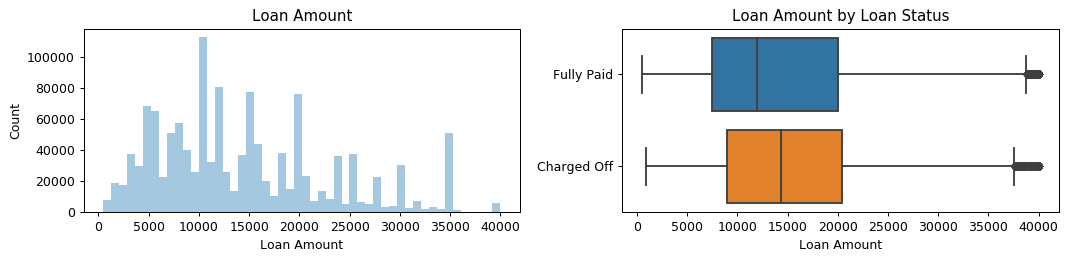

In [39]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

* Charged-off loans tend to have higher loan amounts. Let's compare the summary statistics by loan status:

---

# TERM

Data Dictionary: "The number of payments on the loan. Values are in months and can be either 36 or 60."

In [40]:
loans['term'].value_counts(dropna=False)

 36 months    988754
 60 months    314853
Name: term, dtype: int64

* Convert term into integers

In [41]:
loans['term'] = loans['term'].apply(lambda s: np.int8(s.split()[0]))

In [42]:
loans['term'].value_counts(normalize=True)

36    0.758476
60    0.241524
Name: term, dtype: float64

* Compare the charge-off rate by loan period:

In [44]:
loans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.160959
60    0.325568
Name: loan_status, dtype: float64

### Loans with five-year periods are more than twice as likely to charge-off as loans with three-year periods.

---

## INTEREST RATE

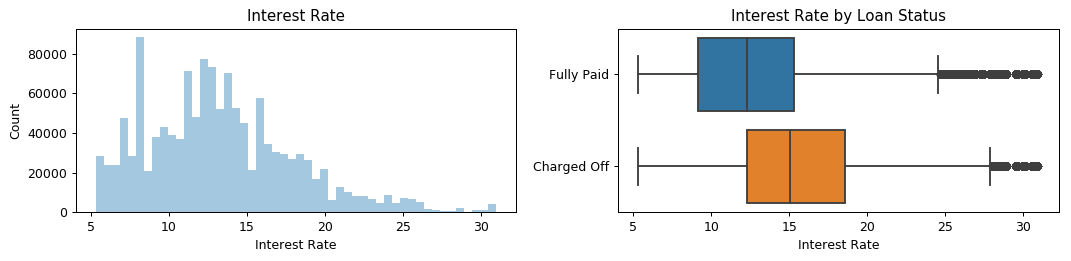

In [46]:
plot_var('int_rate', 'Interest Rate', continuous=True)

* __Charged-off loans tend to have much higher interest rates.__

---

## Installments

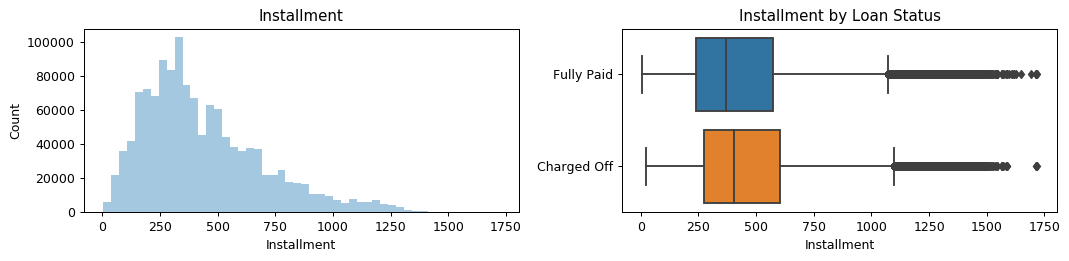

In [47]:
plot_var('installment', 'Installment', continuous=True)

* Charged-off loans tend to have higher installments.

---

### Grade and sub-grade

Grade and sub-grade will essentially provide the same information, so we can only analyse sub-grade and drop grade column.

In [49]:
loans.drop('grade', axis=1, inplace=True)

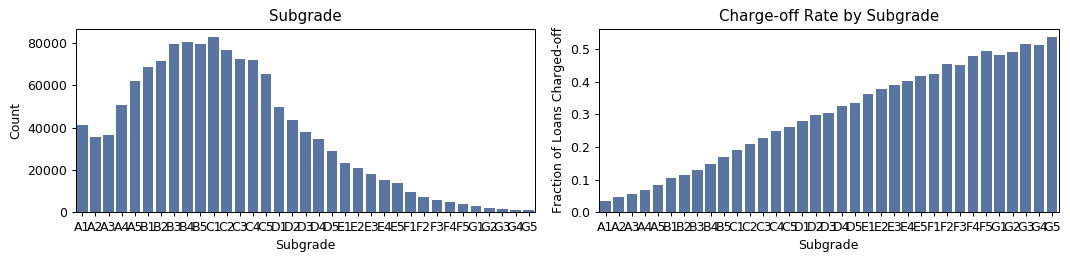

In [50]:
plot_var('sub_grade', 'Subgrade', continuous=False)

# The grade is implied by the subgrade, so let's drop the grade column.

---

### We drop employment title as it is an object feature with lots of irrelevelent information.

In [51]:
loans.drop(labels='emp_title', axis=1, inplace=True)

---

## Employment length

"Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years."

In [52]:
loans['emp_length'].value_counts(dropna=False).sort_index()

1 year        85677
10+ years    428547
2 years      117820
3 years      104200
4 years       78029
5 years       81623
6 years       60933
7 years       58145
8 years       59125
9 years       49504
< 1 year     104550
NaN           75454
Name: emp_length, dtype: int64

In [53]:
loans['emp_length'].replace(to_replace='10+ years', value='10 years', inplace=True)

In [54]:
loans['emp_length'].replace('< 1 year', '0 years', inplace=True)

In [55]:
def emp_length_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])

In [56]:
loans['emp_length'] = loans['emp_length'].apply(emp_length_to_int)

In [57]:
loans['emp_length'].value_counts(dropna=False).sort_index()

0.0     104550
1.0      85677
2.0     117820
3.0     104200
4.0      78029
5.0      81623
6.0      60933
7.0      58145
8.0      59125
9.0      49504
10.0    428547
NaN      75454
Name: emp_length, dtype: int64

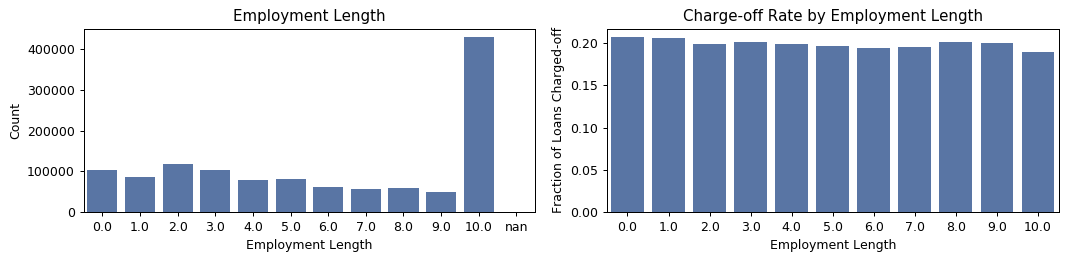

In [58]:
plot_var('emp_length', 'Employment Length', continuous=False)

* __Loan status does not appear to vary much with employment length on average, except for a small drop in charge-offs for borrowers with over 10 years of employment.__



___

## HOME OWNERSHIP

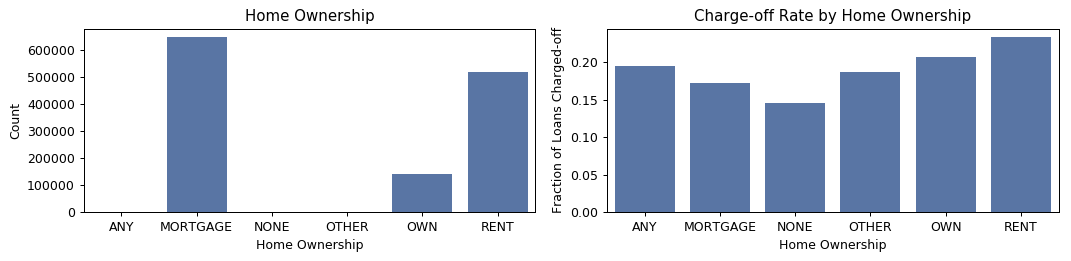

In [59]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appear to be large differences in charge-off rates by home ownership status. Renters have a higher probability of charge-off. 

---

## ISSUE DATE

"The month which the loan was funded."

Because we're only using variables available to investors before the loan was funded, issue_d will not be included in the final model. We're keeping it for now just to perform the train/test split later, then we'll drop it.

---

## PURPOSE

In [63]:
loans.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
wedding               0.121622
car                   0.146388
credit_card           0.170267
educational           0.171779
home_improvement      0.178531
major_purchase        0.187235
vacation              0.192396
other                 0.211706
debt_consolidation    0.212567
house                 0.217167
medical               0.219064
moving                0.234409
renewable_energy      0.237102
small_business        0.297468
Name: loan_status, dtype: float64

## Notice that only 12% of completed loans for weddings have charged-off, but 30% of completed small business loans have charged-off.

---

## TITLE

*  "The loan title provided by the borrower."

In [64]:
loans['title'].describe()

count                1288181
unique                 61678
top       Debt consolidation
freq                  638945
Name: title, dtype: object

In [65]:
loans['title'].value_counts().head(10)

Debt consolidation         638945
Credit card refinancing    240679
Home improvement            72125
Other                       63875
Major purchase              22974
Debt Consolidation          15692
Medical expenses            13060
Business                    11359
Car financing               10768
Vacation                     7721
Name: title, dtype: int64

## based on the top 10 titles, the purpose variable appears to already contain this information. So we drop the title variable.

In [66]:
loans.drop('title', axis=1, inplace=True)

---

## ZIP CODE

In [69]:
loans['zip_code'].nunique()

943

* There are a lot of different zip codes, so let's just keep the state column.

---

## ADDRESS STATE

In [70]:
loans.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

addr_state
DC    0.131157
ME    0.139063
VT    0.141071
IA    0.142857
OR    0.144003
NH    0.145923
CO    0.155936
WV    0.158483
WA    0.158880
SC    0.164761
KS    0.167646
WY    0.169665
MT    0.169776
UT    0.171794
CT    0.174894
RI    0.180077
IL    0.182302
WI    0.183171
GA    0.184221
MA    0.191122
ID    0.193320
AZ    0.196778
CA    0.197103
TX    0.199123
AK    0.199225
MN    0.199389
VA    0.200233
DE    0.202128
HI    0.202954
MI    0.203645
OH    0.208078
ND    0.208471
PA    0.208808
NC    0.209422
KY    0.210886
NJ    0.212716
MD    0.213421
SD    0.213513
MO    0.214171
NM    0.215423
FL    0.215615
TN    0.215956
IN    0.216053
NV    0.220537
NY    0.221452
LA    0.234072
OK    0.237126
AL    0.237336
AR    0.241656
NE    0.254237
MS    0.262033
Name: loan_status, dtype: float64

### The charge-off rate ranges from 13.0% in Washington, DC to 27.6% in Mississippi.

___

## dti

* "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."

In [71]:
loans.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,261593.0,20.161590,11.292371,0.0,13.58,19.77,26.31,999.0
Fully Paid,1041702.0,17.780909,10.795249,-1.0,11.42,17.09,23.41,999.0


* Completed loans that are charged off tend to have higher debt-to-income ratios.

---

## Convert loan status to 0/1 charge-off indicator

* Change the response variable loan_status to a 0/1 variable, where 0 indicates fully paid and 1 indicates charge-off:

In [ ]:
loans['charged_off'] = (loans['loan_status'] == 'Charged Off').apply(np.uint8)
loans.drop('loan_status', axis=1, inplace=True)

## Creating Dummy Variable##

In [ ]:
loans.shape

In [ ]:
missing_fractions = loans.isnull().mean().sort_values(ascending=False)

In [ ]:
print(missing_fractions[missing_fractions > 0])

In [ ]:
print(loans.columns)

In [ ]:
loans = pd.get_dummies(loans, columns=['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status', 'application_type'], drop_first=True)

In [ ]:
loans.shape

In [ ]:
loans.sample(5)

## Train Test Split ##

In [ ]:
loans['issue_d'].sample(5)

In [ ]:
loans['issue_d'].isnull().any()

In [ ]:
loans['issue_d'] = pd.to_datetime(loans['issue_d'])

In [ ]:
loans['issue_d'].sample(5)

In [ ]:
loans['issue_d'].describe()

In [ ]:
plt.figure(figsize=(6,3), dpi=90)
loans['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')

In [ ]:
loans_train = loans.loc[loans['issue_d'] <  loans['issue_d'].quantile(0.9)]
loans_test =  loans.loc[loans['issue_d'] >= loans['issue_d'].quantile(0.9)]

In [ ]:
print('Number of loans in the partition:   ', loans_train.shape[0] + loans_test.shape[0])
print('Number of loans in the full dataset:', loans.shape[0])

In [ ]:
loans_test.shape[0] / loans.shape[0]

In [ ]:
del loans

In [ ]:
loans_train['issue_d'].describe()

In [ ]:
loans_test['issue_d'].describe()

In [ ]:
loans_train.drop('issue_d', axis=1, inplace=True)
loans_test.drop('issue_d', axis=1, inplace=True)

In [ ]:
y_train = loans_train['charged_off']
y_test = loans_test['charged_off']

In [ ]:
X_train = loans_train.drop('charged_off', axis=1)
X_test = loans_test.drop('charged_off', axis=1)

In [ ]:
del loans_train, loans_test

## Linear Dependence of Charge-off on the Predictors ##

In [ ]:
linear_dep = pd.DataFrame()

In [ ]:
for col in X_train.columns:
    linear_dep.loc[col, 'pearson_corr'] = X_train[col].corr(y_train)
linear_dep['abs_pearson_corr'] = abs(linear_dep['pearson_corr'])

In [ ]:
from sklearn.feature_selection import f_classif
for col in X_train.columns:
    mask = X_train[col].notnull()
    (linear_dep.loc[col, 'F'], linear_dep.loc[col, 'p_value']) = f_classif(pd.DataFrame(X_train.loc[mask, col]), y_train.loc[mask])

In [ ]:
linear_dep.sort_values('abs_pearson_corr', ascending=False, inplace=True)
linear_dep.drop('abs_pearson_corr', axis=1, inplace=True)

In [ ]:
linear_dep.reset_index(inplace=True)
linear_dep.rename(columns={'index':'variable'}, inplace=True)


In [ ]:
linear_dep.head(20)

In [ ]:
linear_dep.tail(20)

## Model Training and Testing ##

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
pipeline_sgdlogreg = Pipeline([
    ('imputer', SimpleImputer(copy=False)), # Mean imputation by default
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [ ]:
param_grid_sgdlogreg = {
    'model__alpha': [10**-5, 10**-2, 10**1],
    'model__penalty': ['l1', 'l2']
}

In [ ]:
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [ ]:
#grid_sgdlogreg.fit(X_train, y_train)

In [ ]:
#grid_sgdlogreg.best_score_ = 0.7138651282339733

In [ ]:
#grid_sgdlogreg.best_params_

## Random forest classifier ##

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline_rfc = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [ ]:
param_grid_rfc = {
    'model__n_estimators': [50] # The number of randomized trees to build
}

In [ ]:
grid_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [ ]:
grid_rfc.fit(X_train, y_train)

In [ ]:
grid_rfc.best_score_

# k-nearest neighbors #

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipeline_knn = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('scaler', StandardScaler(copy=False)),
    ('lda', LinearDiscriminantAnalysis()),
    ('model', KNeighborsClassifier(n_jobs=-1))
])

In [ ]:
param_grid_knn = {
    'lda__n_components': [3, 9], # Number of LDA components to keep
    'model__n_neighbors': [5, 25, 125] # The 'k' in k-nearest neighbors
}

In [ ]:
grid_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [ ]:
grid_knn.fit(X_train, y_train)

In [ ]:
grid_knn.best_score_

In [ ]:
grid_knn.best_params_

## Tune hyperparameters on the chosen model more finely##

In [ ]:
print('Cross-validated AUROC scores')
print(grid_sgdlogreg.best_score_, '- Logistic regression')
print(grid_rfc.best_score_, '- Random forest')
print(grid_knn.best_score_, '- k-nearest neighbors')

In [ ]:
param_grid_sgdlogreg = {
    'model__alpha': np.logspace(-4.5, 0.5, 11), # Fills in the gaps between 10^-5 and 10^1
    'model__penalty': ['l1', 'l2']
}
print(param_grid_sgdlogreg)

In [ ]:
grid_sgdlogreg = GridSearchCV(estimator=pipeline_sgdlogreg, param_grid=param_grid_sgdlogreg, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [ ]:
grid_sgdlogreg.fit(X_train, y_train)

In [ ]:
grid_sgdlogreg.best_score_

In [ ]:
grid_sgdlogreg.best_params_

## Test set evaluation ##

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
y_score = grid_sgdlogreg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)

## Conclusion ##

We applied machine learning methods to predict the probability that a requested loan on LendingClub will charge off. After training and evaluating three different models (logistic regression, random forest, and k-nearest neighbors), we found that all three performed similarly according to a cross-validated AUROC score on the training data. We selected logistic regression (with ridge penalty) because it was the fastest model to train, and this model obtained an AUROC score of 0.689 on a test set consisting of the most recent 10% of the loans.

This model, while far from perfect, can provide a somewhat informed prediction of the likelihood that a loan will charge off, using only data available to potential investors before the loan is fully funded.

We also found that, according to linear measures of correlation between the predictors and the response, the most important variables for predicting charge-off are the loan interest rate and term, and the borrower's FICO score and debt-to-income ratio.